In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import torch

In [32]:
# with open('CT_En1000_pctrl(0.00,1.00,21)_pproj(0.00,1.00,21)_L(10,14,2)_xj(1-3,2-3).pickle','rb') as f:
with open('CT_En2000_pctrl(0.00,1.00,11)_pproj(0.00,0.00,1)_L(8,20,2)_xj(1-3,2-3)_seed0_es2000_64.pickle','rb') as f:
    data=pickle.load(f)

In [42]:
# with open('CT_En1000_pctrl(0.00,1.00,21)_pproj(0.00,1.00,21)_L(10,14,2)_xj(1-3,2-3).pickle','rb') as f:
data1=[]
for i in range(2):
    with open(f'CT_En400_pctrl(0.00,1.00,11)_pproj(0.00,0.00,1)_L(20,22,2)_xj(1-3,2-3)_seed{i}_es400_64.pickle','rb') as f:
        data1.append(pickle.load(f))

In [5]:
def combine_picke(data0,data1,new_L):
    ''' combine two pickle into one pickle, along the L axis, should make sure that p_ctrl and p_proj have the same dimension'''
    for key,val in data0.items():
        if 'args' not in key:
            data0[key]=torch.concat([data0[key],data1[key].cpu()],dim=0)
    data0['args'].L=new_L
    

In [22]:
def combine_picke_ensemble(data,new_seed):
    ''' combine pickles into one pickle, along the L axis, should make sure that p_ctrl and p_proj have the same dimension'''
    for data in data:
    for key,val in data.items():
        if 'args' not in key:
            data0[key]=torch.concat([data0[key],data1[key]],dim=-1)
    data0['args'].seed=new_seed
    

In [30]:
data['O'].shape

torch.Size([6, 11, 1, 2000])

In [23]:
data['args'].seed,data1['args'].seed

(0, 1)

In [29]:
combine_picke(data, data1, [8,20,2])

In [24]:
combine_picke_ensemble(data, data1, [0,1])

In [31]:
with open('CT_En2000_pctrl(0.00,1.00,11)_pproj(0.00,0.00,1)_L(8,20,2)_xj(1-3,2-3)_seed0_es2000_64.pickle','wb') as f:
    pickle.dump(data,f)

In [25]:
with open('CT_En1000_pctrl(0.00,1.00,11)_pproj(0.00,0.00,1)_L(18,20,2)_xj(1-3,2-3)_seed01_es2000_64.pickle','wb') as f:
    pickle.dump(data,f)

In [33]:
data['O'].shape

torch.Size([6, 11, 1, 2000])

In [34]:
p_ctrl_list=np.linspace(data['args'].p_ctrl[0],data['args'].p_ctrl[1],int(data['args'].p_ctrl[2]))
p_proj_list=np.linspace(data['args'].p_proj[0],data['args'].p_proj[1],int(data['args'].p_proj[2]))
L_list=np.arange(*data['args'].L)

Text(0.5, 0, '$p_{ctrl}$')

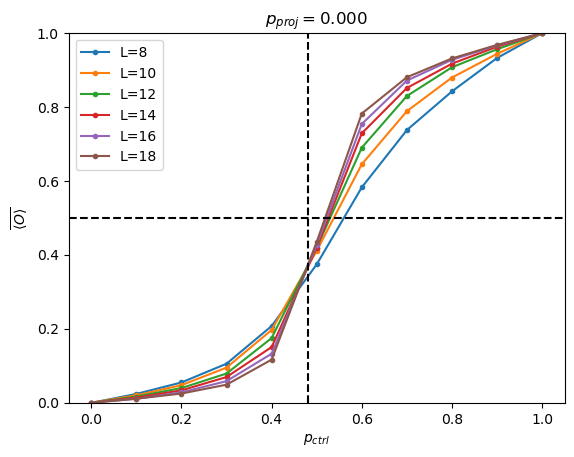

In [35]:
fig,ax=plt.subplots()
p_proj_idx=0
for i in range(data['O'].shape[0]):
    ax.plot(p_ctrl_list,data['O'][i,:,p_proj_idx].mean(axis=-1),'.-',label=f'L={L_list[i]}')
ax.legend()
ax.axvline(x=0.48,ls='dashed',color='k')
ax.axhline(y=0.5,ls='dashed',color='k')
# ax.set_xlim([.2,.8])
ax.set_ylim([0,1])
ax.set_title(f'$p_{{proj}}={p_proj_list[p_proj_idx]:.3f}$')
ax.set_ylabel(r'$\overline{\langle O \rangle}$')
ax.set_xlabel('$p_{ctrl}$')

Text(0.5, 0, '$p_{ctrl}$')

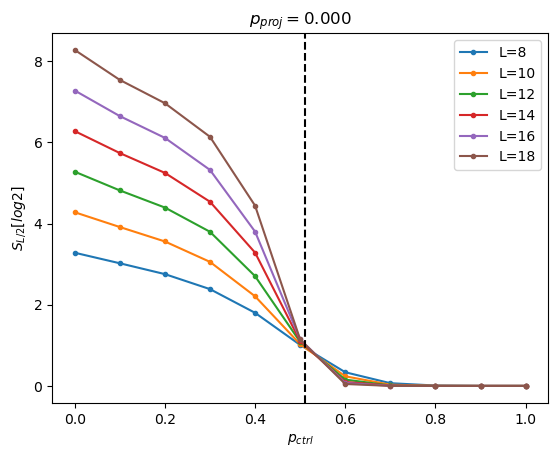

In [36]:
fig,ax=plt.subplots()
p_proj_idx=0
for i in range(data['EE'].shape[0]):
    ax.plot(p_ctrl_list,data['EE'][i,:,p_proj_idx].mean(axis=-1)/np.log(2),'.-',label=f'L={L_list[i]}')
ax.legend()
ax.axvline(x=0.51,ls='dashed',color='k')
# ax.set_xlim([.2,.8])
ax.set_title(f'$p_{{proj}}={p_proj_list[p_proj_idx]:.3f}$')
ax.set_ylabel('$S_{L/2} [log 2]$')
ax.set_xlabel('$p_{ctrl}$')

Text(0.5, 0, '$p_{ctrl}$')

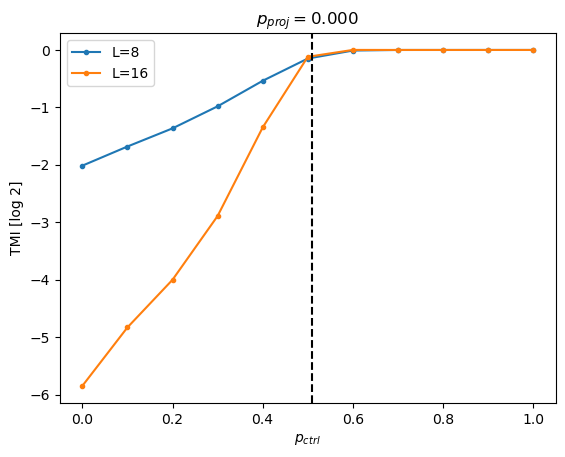

In [37]:
fig,ax=plt.subplots()
p_proj_idx=0
for i in range(data['TMI'].shape[0])[::4]:
    ax.plot(p_ctrl_list,data['TMI'][i,:,p_proj_idx].mean(axis=-1)/np.log(2),'.-',label=f'L={L_list[i]}')
ax.legend()
ax.axvline(x=0.51,ls='dashed',color='k')
# ax.set_xlim([.2,.8])
ax.set_title(f'$p_{{proj}}={p_proj_list[p_proj_idx]:.3f}$')
ax.set_ylabel('TMI [log 2]')
ax.set_xlabel('$p_{ctrl}$')

In [64]:
plt.pcolormesh(p_ctrl_list_2,p_proj_list_2,data2['O'][1,:,:].mean(axis=-1),vmin=-1,vmax=1,cmap='seismic')
plt.colorbar()

NameError: name 'p_ctrl_list_2' is not defined

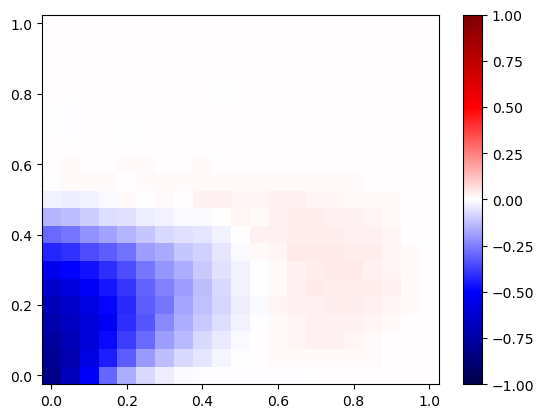

In [66]:
plt.pcolormesh(p_ctrl_list,p_proj_list,np.tanh(data['TMI'][-1,:,:].mean(axis=-1)),vmin=-1,vmax=1,cmap='seismic')
plt.colorbar()

In [2]:
with open('CT_En100_pctrl(0.00,1.00,21)_pproj(0.00,1.00,21)_L(10,14,2)_xj(0).pickle','rb') as f:
    data2=pickle.load(f)

In [3]:
p_ctrl_list_2=np.linspace(data2['args'].p_ctrl[0],data2['args'].p_ctrl[1],int(data2['args'].p_ctrl[2]))
p_proj_list_2=np.linspace(data2['args'].p_proj[0],data2['args'].p_proj[1],int(data2['args'].p_proj[2]))
L_list_2=np.arange(*data2['args'].L)

Text(0.5, 0, '$p_{ctrl}$')

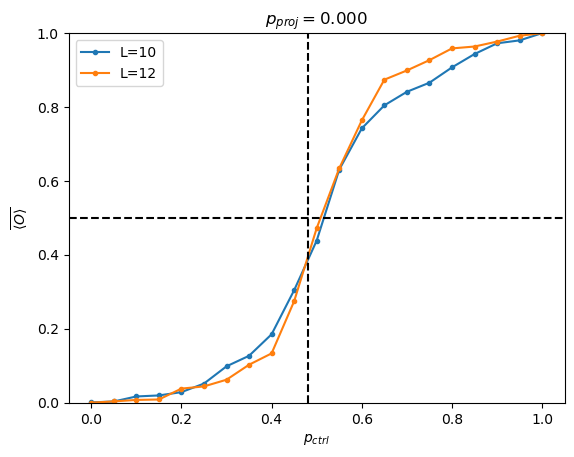

In [6]:
fig,ax=plt.subplots()
p_proj_idx=0
for i in range(data2['O'].shape[0]):
    ax.plot(p_ctrl_list_2,data2['O'][i,:,p_proj_idx].mean(axis=-1),'.-',label=f'L={L_list_2[i]}')
ax.legend()
ax.axvline(x=0.48,ls='dashed',color='k')
ax.axhline(y=0.5,ls='dashed',color='k')
# ax.set_xlim([.2,.8])
ax.set_ylim([0,1])
ax.set_title(f'$p_{{proj}}={p_proj_list_2[p_proj_idx]:.3f}$')
ax.set_ylabel(r'$\overline{\langle O \rangle}$')
ax.set_xlabel('$p_{ctrl}$')

Text(0.5, 0, '$p_{ctrl}$')

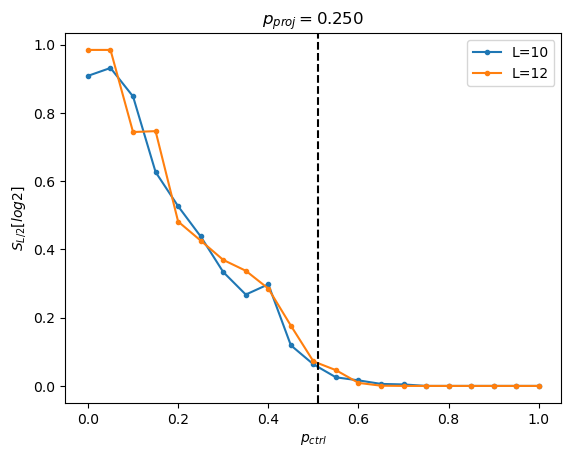

In [7]:
fig,ax=plt.subplots()
p_proj_idx=5
for i in range(data2['EE'].shape[0]):
    ax.plot(p_ctrl_list_2,data2['EE'][i,:,p_proj_idx].mean(axis=-1)/np.log(2),'.-',label=f'L={L_list_2[i]}')
ax.legend()
ax.axvline(x=0.51,ls='dashed',color='k')
# ax.set_xlim([.2,.8])
ax.set_title(f'$p_{{proj}}={p_proj_list_2[p_proj_idx]:.3f}$')
ax.set_ylabel('$S_{L/2} [log 2]$')
ax.set_xlabel('$p_{ctrl}$')

Text(0.5, 0, '$p_{ctrl}$')

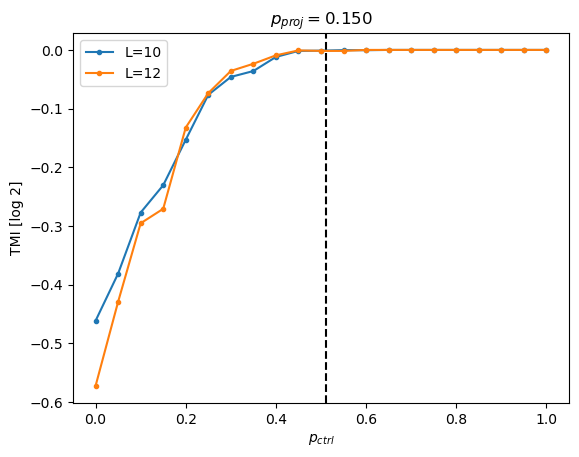

In [8]:
fig,ax=plt.subplots()
p_proj_idx=3
for i in range(data2['TMI'].shape[0]):
    ax.plot(p_ctrl_list_2,data2['TMI'][i,:,p_proj_idx].mean(axis=-1)/np.log(2),'.-',label=f'L={L_list_2[i]}')
ax.legend()
ax.axvline(x=0.51,ls='dashed',color='k')
# ax.set_xlim([.2,.8])
ax.set_title(f'$p_{{proj}}={p_proj_list_2[p_proj_idx]:.3f}$')
ax.set_ylabel('TMI [log 2]')
ax.set_xlabel('$p_{ctrl}$')

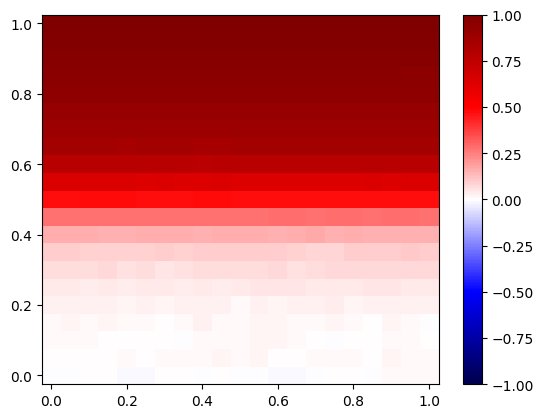

In [64]:
plt.pcolormesh(p_ctrl_list_2,p_proj_list_2,data2['O'][1,:,:].mean(axis=-1),vmin=-1,vmax=1,cmap='seismic')
plt.colorbar()

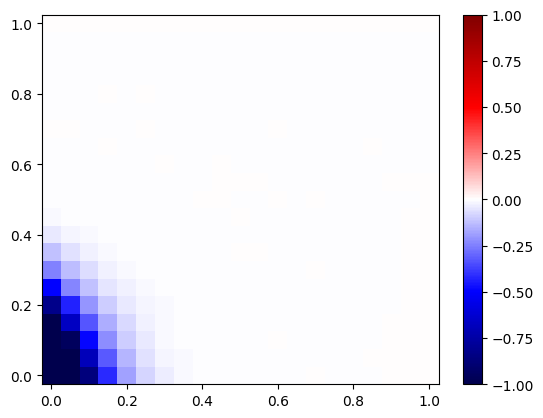

In [60]:
plt.pcolormesh(p_ctrl_list_2,p_proj_list_2,data2['TMI'][1,:,:].mean(axis=-1),vmin=-1,vmax=1,cmap='seismic')
plt.colorbar()

Text(0.5, 0, '$p_{ctrl}$')

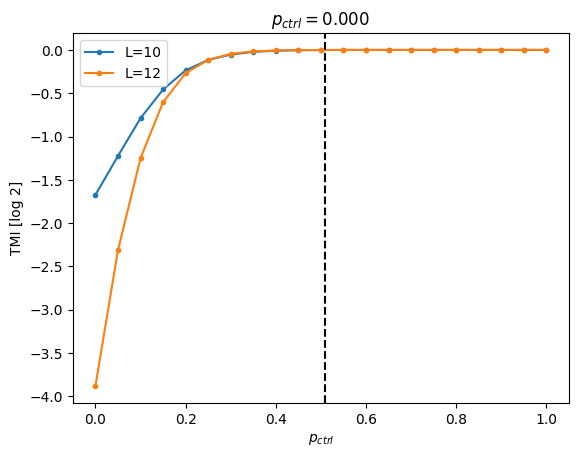

In [59]:
fig,ax=plt.subplots()
p_ctrl_idx=0
for i in range(data2['TMI'].shape[0]):
    ax.plot(p_ctrl_list_2,data2['TMI'][i,p_ctrl_idx,:].mean(axis=-1)/np.log(2),'.-',label=f'L={L_list[i]}')
ax.legend()
ax.axvline(x=0.51,ls='dashed',color='k')
# ax.set_xlim([.2,.8])
ax.set_title(f'$p_{{ctrl}}={p_proj_list[p_ctrl_idx]:.3f}$')
ax.set_ylabel('TMI [log 2]')
ax.set_xlabel('$p_{ctrl}$')

In [2]:
from scipy.stats import poisson, norm

In [29]:
k=200000
people=poisson.rvs(mu=90,size=k)

price=np.array([norm.rvs(loc=15,scale=3,size=p).sum() for p in people ])

In [30]:
(price>1000).sum()/k

0.99408

In [35]:
np.sum([poisson.pmf(k=k,mu=90)*(1-norm.cdf(x=1000,loc=15*k,scale=3*np.sqrt(k))) for k in range(1,4000)])

0.9940089674083596

In [36]:
def pdf(x):
    np.sum([poisson.pmf(k=k,mu=90)*(1-norm.cdf(x=x,loc=15*k,scale=3*np.sqrt(k))) for k in range(1,4000)])

In [38]:
x_list=np.arange(900,2000)
rev_list=[pdf(x) for x in x_list]

KeyboardInterrupt: 

In [ ]:
plt.plot(x_list,rev_list)

(array([1.80086441e-05, 2.55122459e-05, 2.10100848e-05, 3.10148871e-05,
        4.05194493e-05, 5.50264127e-05, 6.70321754e-05, 7.05338563e-05,
        9.85473027e-05, 1.19057147e-04, 1.43568913e-04, 1.75084040e-04,
        1.89090764e-04, 2.57123419e-04, 2.79634224e-04, 3.29658236e-04,
        3.88686570e-04, 4.22702897e-04, 5.38258364e-04, 5.68272771e-04,
        6.69821514e-04, 7.78373619e-04, 8.22894990e-04, 9.65463422e-04,
        1.04149992e-03, 1.17456379e-03, 1.26810869e-03, 1.39516968e-03,
        1.50822395e-03, 1.56375060e-03, 1.70831999e-03, 1.80736754e-03,
        1.92792540e-03, 2.07049384e-03, 2.22106611e-03, 2.28909877e-03,
        2.34212422e-03, 2.42416360e-03, 2.52371138e-03, 2.57723707e-03,
        2.72981031e-03, 2.67028174e-03, 2.72030575e-03, 2.75532255e-03,
        2.79033936e-03, 2.75432207e-03, 2.76082520e-03, 2.70729950e-03,
        2.67028174e-03, 2.51920922e-03, 2.45817993e-03, 2.46118137e-03,
        2.34212422e-03, 2.25458220e-03, 2.13152313e-03, 2.103009

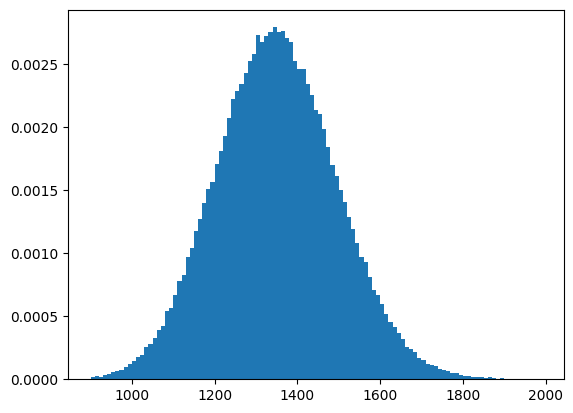

In [32]:
plt.hist(price,bins=range(900,2000,10),density=True)

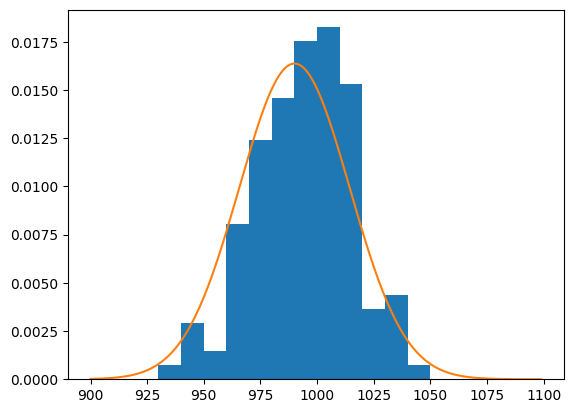

In [26]:
k0=66
plt.hist(price[people==k0],bins=range(900,1100,10),density=True)
# plt.hist(rev,bins=range(900,1100,1),density=True)
plt.plot(np.arange(900,1100,1), [norm.pdf(x=x,loc=15*k0,scale=3*np.sqrt(k0)) for x in np.arange(900,1100,1)] )
# ?? the dist is not 15k??

In [27]:
price[people==k0].shape

(137,)

In [14]:
rev=norm.rvs(loc=15,scale=3,size=(66,1000000)).sum(axis=0)

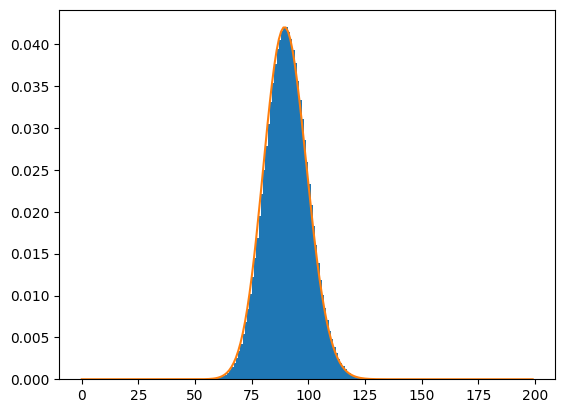

In [72]:
plt.hist(people,density=True,bins=range(0,200))
plt.plot([poisson.pmf(k=k,mu=90) for k in range(200)])

In [50]:
poisson.pmf(k=k,mu=90)*1-norm.cdf(x=1000,loc=15*k,scale=3*np.sqrt(k))

0.0009476568559710924

In [56]:
k=100
(1-norm.cdf(x=1000,loc=15*k,scale=3*np.sqrt(k)))

1.0

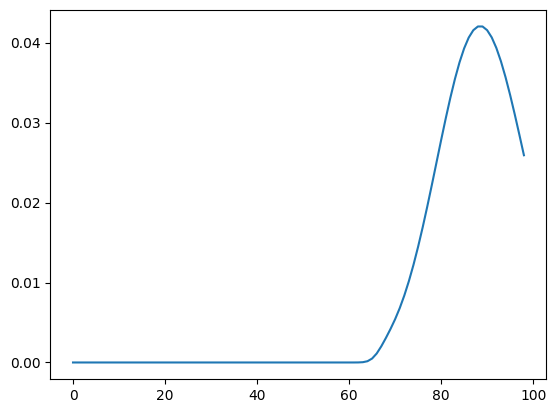

In [57]:
plt.plot([poisson.pmf(k=k,mu=90)*(1-norm.cdf(x=1000,loc=15*k,scale=3*np.sqrt(k))) for k in range(1,100)])

In [47]:
1000/15

66.66666666666667

In [ ]:
plt.hist(people*price)
plt.hist(price)